# Data Scientist Take-Home Exercise
## Data Dictionary
1. customer_info  
2. product_info  
3. customer_transaction_info  
4. orders_returned_info  
5. region_seller_info

## **Steps**
## **Step 1: Data Preprocessing & Cleaning**
## **Step 2: Visualizations & Statistics**

In [79]:
import numpy as np  # Version: 1.26.4
import pandas as pd # Version: 2.2.2
import matplotlib.pyplot as plt # Version: 3.9.2
import seaborn as sns # Version: 0.13.2


## 1.1 Product Info ##

In [80]:
# load dataset
df_product = pd.read_csv("./data/product_info.csv")

In [81]:
df_product.shape

(1894, 5)

In [82]:
df_product.head()

,index,Product ID,Category,Sub-Category,Product Name
0,0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [83]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         1894 non-null   int64 
 1   Product ID    1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
 4   Product Name  1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.1+ KB


In [84]:
# isnull() => if value is not present then return true else false, sum() will sum up all true values
df_product.isnull().sum()

index           0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
dtype: int64

<Axes: >

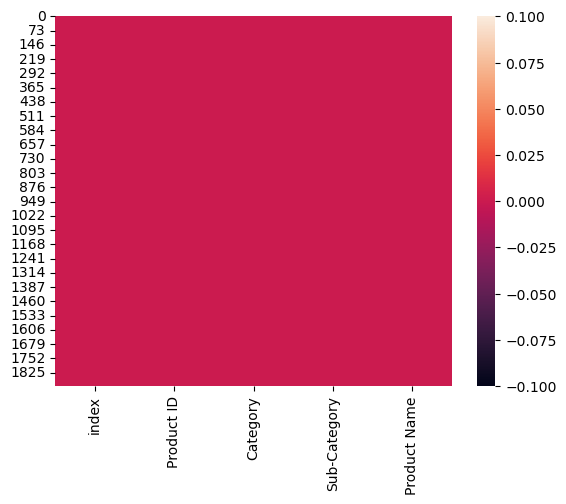

In [85]:
# sns.heatmap is a function in the Seaborn library used to visualize data in a matrix format with color-coded values
# white color is for null value, if screen is pink mean data have not null value
sns.heatmap(df_product.isnull())

### Data analysis
* white color is for null value, if screen is pink mean data have not null value

In [86]:
# returns the number of unique values in each column
df_product.nunique()

index           1894
Product ID      1862
Category           3
Sub-Category      17
Product Name    1850
dtype: int64

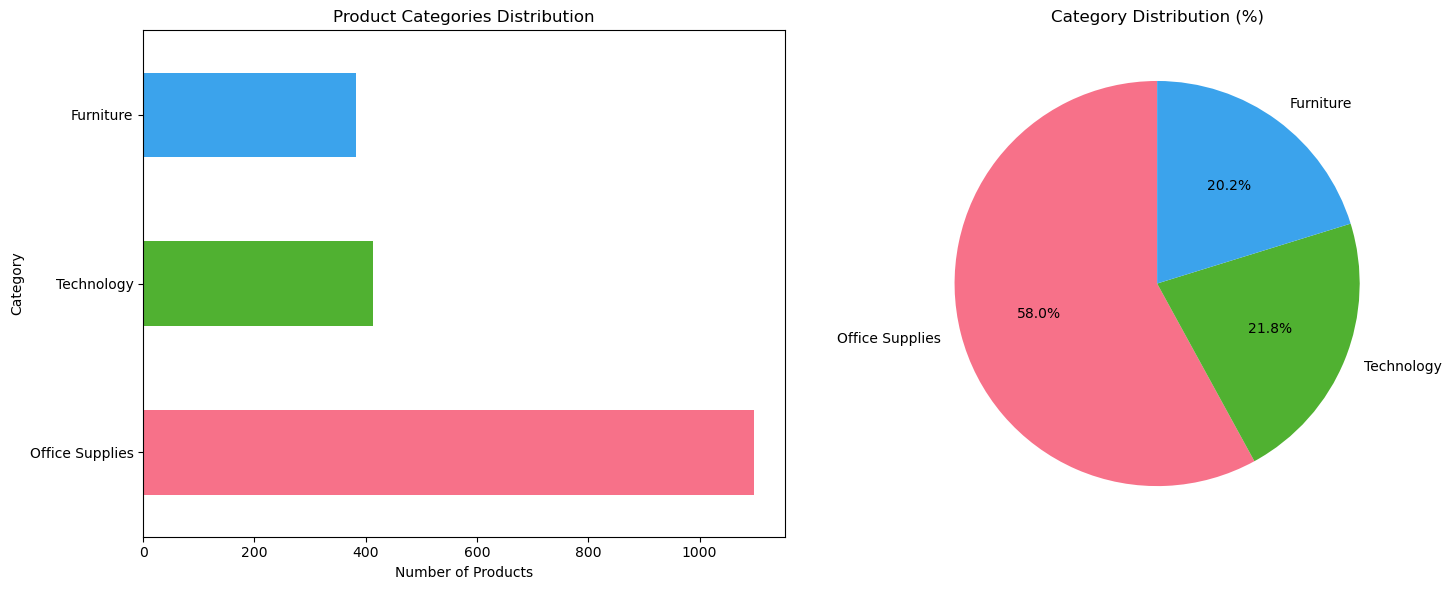

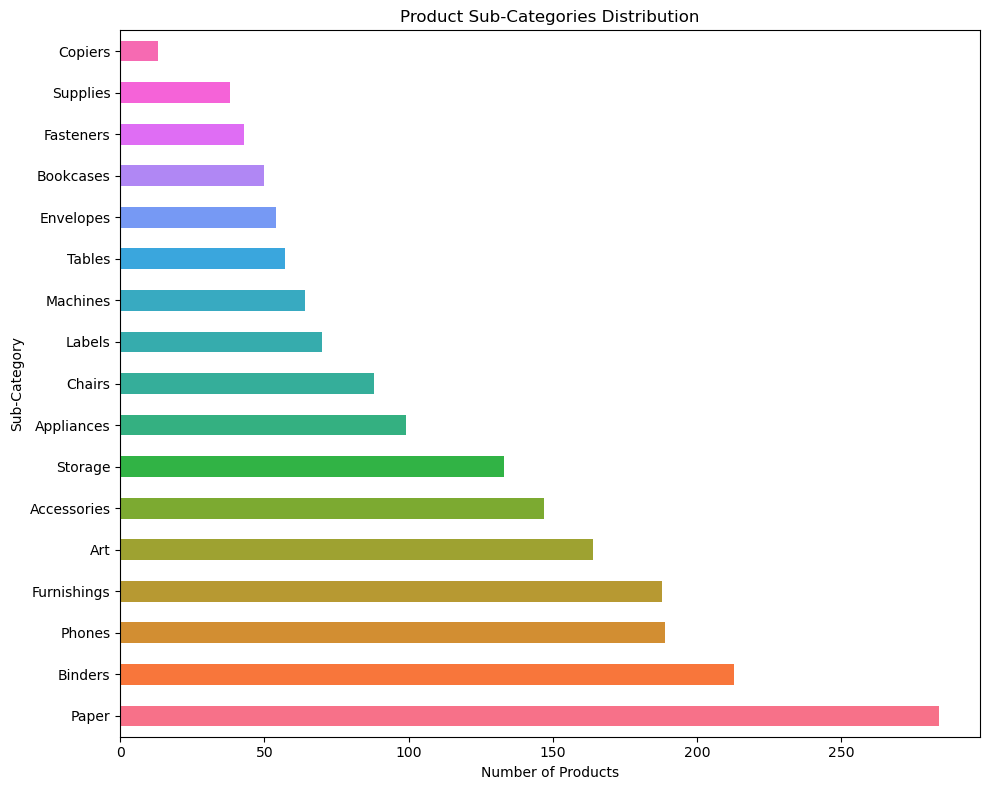

In [87]:

# Creating a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Horizontal bar chart for Categories
category_counts = df_product['Category'].value_counts()
colors = sns.color_palette('husl', n_colors=len(category_counts))

category_counts.plot(kind='barh', ax=ax1, color=colors)
ax1.set_title('Product Categories Distribution')
ax1.set_xlabel('Number of Products')
ax1.set_ylabel('Category')

# Plot 2: Pie chart for Categories
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Category Distribution (%)')

plt.tight_layout()
plt.show()

# Creating a figure for Sub-Categories (using horizontal bars due to more categories)
plt.figure(figsize=(10, 8))
subcategory_counts = df_product['Sub-Category'].value_counts()
colors_sub = sns.color_palette('husl', n_colors=len(subcategory_counts))

# Plot horizontal bars for Sub-Categories
subcategory_counts.plot(kind='barh', color=colors_sub)
plt.title('Product Sub-Categories Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Sub-Category')

plt.tight_layout()
plt.show()

### Data analysis
* Office Supplies is the highest category
* Paper is the highest sub-category

In [88]:
# Create a new column 'printer_related'
# It is True if 'Product Name' contains "printer"
# AND 'Sub-Category' is "Machines", otherwise False

In [89]:
df_product['printer_related'] = np.where(
    df_product['Product Name'].str.contains("printer", case=False) &
    (df_product['Sub-Category'] == "Machines"),
    True, False
)


In [90]:
df_product.head()

,index,Product ID,Category,Sub-Category,Product Name,printer_related
0,0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,False
1,1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",False
2,2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,False
3,3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,False
4,4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,False


In [91]:
df_product.drop('index', axis=1, inplace=True)

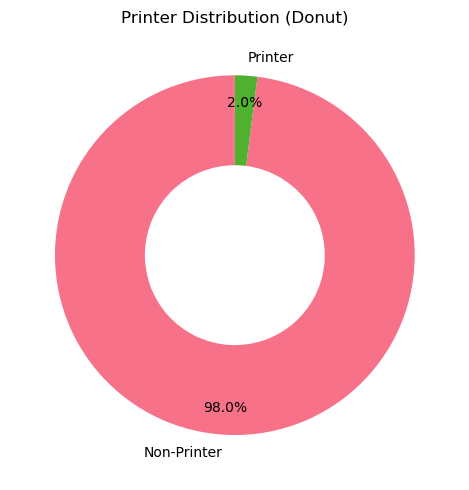

In [92]:

# Calculate the counts and percentages
counts = df_product['printer_related'].value_counts()
percentages = df_product['printer_related'].value_counts(normalize=True) * 100

# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 5))



# 3. Donut Chart

plt.pie(counts, labels=['Non-Printer', 'Printer'], autopct='%1.1f%%',
        colors=colors, startangle=90, pctdistance=0.85,
        wedgeprops=dict(width=0.5))
plt.title('Printer Distribution (Donut)')

plt.tight_layout()
plt.show()

### Data analysis
* only 2% data is realated to Printer.

### 1.2 Customer Transaction Info ##

In [93]:
df_customer_tran =  pd.read_csv("./data/customer_transaction_info.csv")

In [94]:
df_customer_tran.shape

(9994, 10)

In [95]:
df_customer_tran.head(6)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit
0,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164
5,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,FUR-FU-10001487,48.8600,7,0.00,14.1694


In [96]:
df_customer_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     9994 non-null   object 
 1   Order Date   9994 non-null   object 
 2   Ship Date    9994 non-null   object 
 3   Ship Mode    9994 non-null   object 
 4   Customer ID  9994 non-null   object 
 5   Product ID   9994 non-null   object 
 6   Sales        9994 non-null   float64
 7   Quantity     9994 non-null   int64  
 8   Discount     9994 non-null   float64
 9   Profit       9994 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 780.9+ KB


In [97]:
# isnull() => if value is not present then return true else false, sum() will sum up all true values
df_customer_tran.isnull().sum()

Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
Product ID     0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

<Axes: >

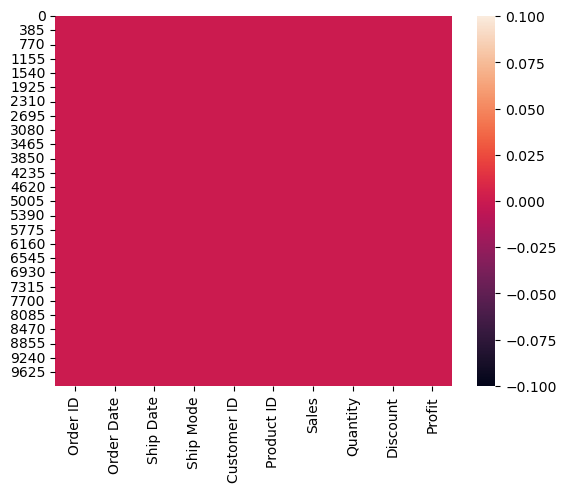

In [98]:
# sns.heatmap is a function in the Seaborn library used to visualize data in a matrix format with color-coded values
# white color is for null value, if screen is pink mean data have not null value
sns.heatmap(df_customer_tran.isnull())

### Data analysis
* white color is for null value, if screen is pink mean data have not null value

In [99]:
# timestamps are not in datetime formate so we are converting it to datetime
df_customer_tran['Order Date'] = pd.to_datetime(df_customer_tran['Order Date'] , format="%d-%m-%Y")
df_customer_tran['Ship Date'] = pd.to_datetime(df_customer_tran['Ship Date'] , format="%d-%m-%Y")

In [100]:
df_customer_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     9994 non-null   object        
 1   Order Date   9994 non-null   datetime64[ns]
 2   Ship Date    9994 non-null   datetime64[ns]
 3   Ship Mode    9994 non-null   object        
 4   Customer ID  9994 non-null   object        
 5   Product ID   9994 non-null   object        
 6   Sales        9994 non-null   float64       
 7   Quantity     9994 non-null   int64         
 8   Discount     9994 non-null   float64       
 9   Profit       9994 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 780.9+ KB


## Feature Engineering ##

**1. Date Features (Order Date, Ship Date)**

In [101]:
# Extract time-related features
df_customer_tran['Order Year'] = df_customer_tran['Order Date'].dt.year
df_customer_tran['Order Month'] = df_customer_tran['Order Date'].dt.month
df_customer_tran['Order Day'] = df_customer_tran['Order Date'].dt.day
df_customer_tran['Order Day of Week'] = df_customer_tran['Order Date'].dt.dayofweek

# Calculate time duration between order and shipping
df_customer_tran['Order to Ship Duration'] = (df_customer_tran['Ship Date'] - df_customer_tran['Order Date']).dt.days

In [102]:
df_customer_tran.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Day of Week,Order to Ship Duration
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136,2016,11,8,1,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820,2016,11,8,1,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714,2016,6,12,6,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310,2015,10,11,6,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164,2015,10,11,6,7


**2. Sales-Related Features (Sales, Quantity, Discount, Profit)**

- Total Revenue

In [103]:
# Create new features
df_customer_tran['Total Revenue'] = df_customer_tran['Sales'] * df_customer_tran['Quantity']


- Average Profit per Unit

In [104]:

df_customer_tran['Average Profit per Unit'] = df_customer_tran['Profit'] / df_customer_tran['Quantity']


- Profit Margin

In [105]:

df_customer_tran['Profit Margin'] = df_customer_tran['Profit'] / df_customer_tran['Sales']


- Discount Impact on Profit

In [106]:

df_customer_tran['Discounted Sales'] = df_customer_tran['Sales'] * (1 - df_customer_tran['Discount'])


- High-Value Customers: based on total sales

In [107]:

df_customer_tran['High Value Customer'] = df_customer_tran.groupby('Customer ID')['Sales'].transform(lambda x: x.sum() > 1000)


In [108]:
df_customer_tran.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Day of Week,Order to Ship Duration,Total Revenue,Average Profit per Unit,Profit Margin,Discounted Sales,High Value Customer
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136,2016,11,8,1,3,523.9200,20.9568,0.1600,261.960000,True
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820,2016,11,8,1,3,2195.8200,73.1940,0.3000,731.940000,True
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714,2016,6,12,6,4,29.2400,3.4357,0.4700,14.620000,True
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310,2015,10,11,6,7,4787.8875,-76.6062,-0.4000,526.667625,True
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164,2015,10,11,6,7,44.7360,1.2582,0.1125,17.894400,True


# Information Plots

 1. Order Distribution Over the Year

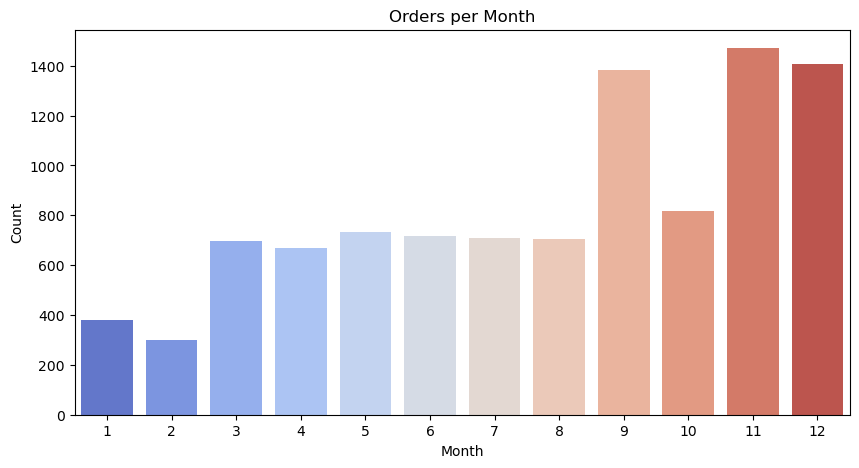

In [109]:

plt.figure(figsize=(10, 5))
sns.countplot(data=df_customer_tran, x='Order Month', palette='coolwarm')
plt.title('Orders per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


📊 **Insight: This shows seasonal order trends**

### 2. Sales by Order Day

<Figure size 1000x600 with 0 Axes>

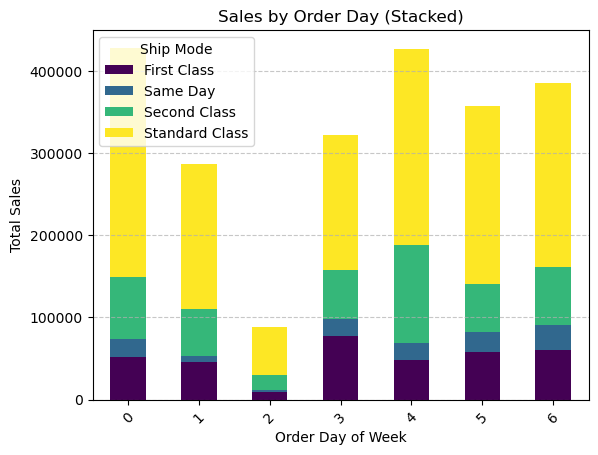

In [110]:
plt.figure(figsize=(10, 6))
order_day_sales = df_customer_tran.groupby(['Order Day of Week', 'Ship Mode'])['Sales'].sum().unstack()
order_day_sales.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Sales by Order Day (Stacked)')
plt.xlabel('Order Day of Week')
plt.ylabel('Total Sales')
plt.legend(title='Ship Mode')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### 3. Total Revenue by Order Day (Line Plot)

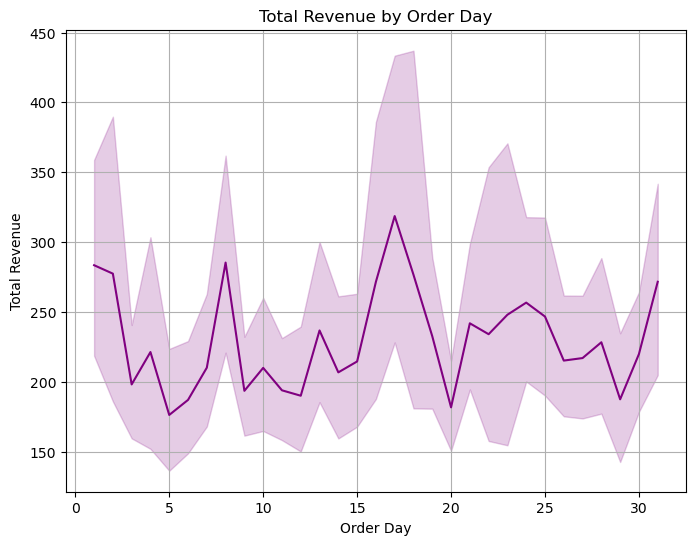

In [111]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_customer_tran, x='Order Day', y='Sales', color='purple')
plt.xlabel('Order Day')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Order Day')
plt.grid(True)
plt.show()


### 4. Sales vs. Profit Scatter Plot

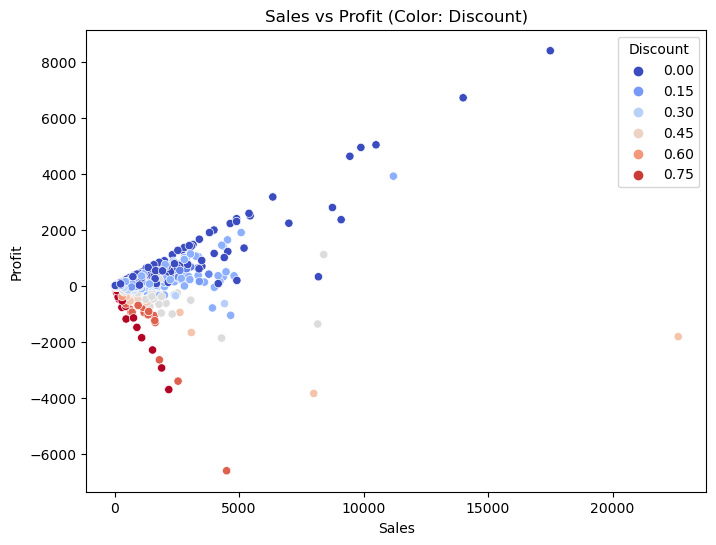

In [112]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_customer_tran, x='Sales', y='Profit', hue='Discount', palette='coolwarm')
plt.title('Sales vs Profit (Color: Discount)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

**📊 Insight: Shows the relationship between sales, profit, and discounts.**

### 5. Profit Margin Distribution

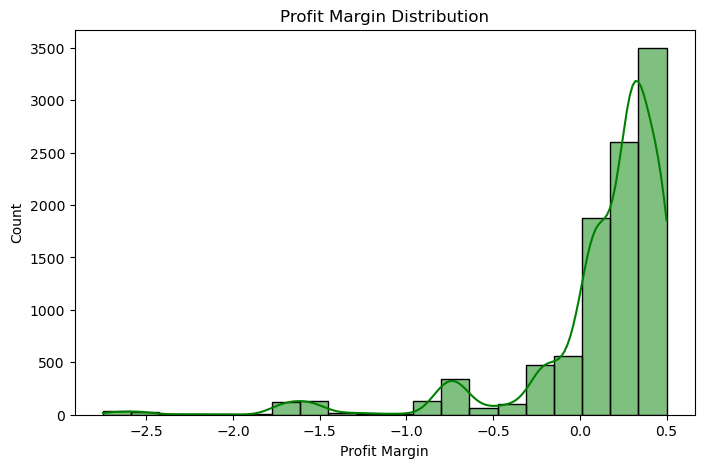

In [113]:
plt.figure(figsize=(8, 5))
sns.histplot(df_customer_tran['Profit Margin'], bins=20, kde=True, color='green')
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin')
plt.ylabel('Count')
plt.show()

**📊 Insight: Understands how profitable transactions are.**

### 6. Ship Mode Preference

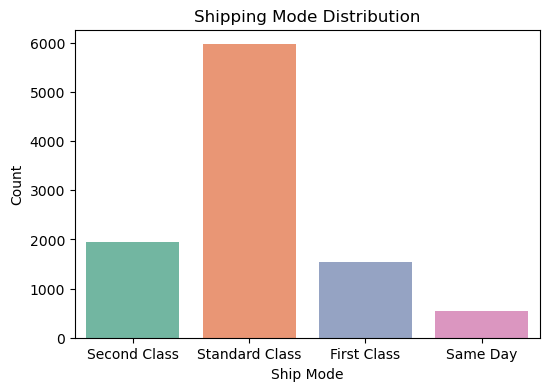

In [114]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_customer_tran, x='Ship Mode', palette='Set2')
plt.title('Shipping Mode Distribution')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

**📊 Insight: Analyzes the most preferred shipping method.**

**1. Highest number of orders are placed on Monday, Tuesday and least orders on Sunday**

**2. Highest revenue is generated on Monday and Wednesday**

**3. Highest revenue are generated at 17th day of month followed by peaks at start, end of month**

**4. In most of orders no discounts were given, followed by 0.2% discount**

## 1.3 Customer Info

In [115]:
df_customer_info = pd.read_csv("./data/customers_info.csv")

In [116]:
df_customer_info.shape

(4910, 8)

In [117]:
df_customer_info.head()

,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South


In [118]:
df_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    4910 non-null   object
 1   Customer Name  4910 non-null   object
 2   Segment        4910 non-null   object
 3   Country        4910 non-null   object
 4   City           4910 non-null   object
 5   State          4910 non-null   object
 6   Postal Code    4910 non-null   int64 
 7   Region         4910 non-null   object
dtypes: int64(1), object(7)
memory usage: 307.0+ KB


In [119]:
df_customer_info.nunique()

Customer ID      793
Customer Name    793
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
dtype: int64

**imp : unique customer id is 793 and total notnull value is 4910 means their is a duplicate value**

In [120]:
df_customer_info[df_customer_info['Customer ID'] == 'CG-12520']

,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
2704,CG-12520,Claire Gute,Consumer,United States,Houston,Texas,77070,Central
3359,CG-12520,Claire Gute,Consumer,United States,Dallas,Texas,75217,Central


**imp : Columns could lead to inconsistencies**

### Dropping the features as we want unique values of customers:

In [121]:
df_customer_info.drop(['City', 'State', 'Postal Code', 'Region'], axis=1, inplace=True)

In [122]:
df_customer_info = df_customer_info.drop_duplicates(subset='Customer ID')

In [123]:
df_customer_info.shape

(793, 4)

In [124]:
df_customer_info.head()

,Customer ID,Customer Name,Segment,Country
0,CG-12520,Claire Gute,Consumer,United States
1,DV-13045,Darrin Van Huff,Corporate,United States
2,SO-20335,Sean O'Donnell,Consumer,United States
3,BH-11710,Brosina Hoffman,Consumer,United States
4,AA-10480,Andrew Allen,Consumer,United States


### 1.4 Order returned Info

In [125]:
df_order_returned_info= pd.read_csv("./data/orders_returned_info.csv")

In [126]:
df_order_returned_info.head()

,index,Returned,Order ID
0,0,Yes,CA-2017-153822
1,1,Yes,CA-2017-129707
2,2,Yes,CA-2014-152345
3,3,Yes,CA-2015-156440
4,4,Yes,US-2017-155999


In [127]:
df_order_returned_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     296 non-null    int64 
 1   Returned  296 non-null    object
 2   Order ID  296 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.1+ KB


In [128]:
df_order_returned_info.nunique()

index       296
Returned      1
Order ID    296
dtype: int64

### 1.5 Region Seller Info

In [129]:
# we will not using this dataset because we dont have any join column
df_region_seller_info = pd.read_json("./data/region_seller_info.json")

In [130]:
df_region_seller_info.head()

,0,1,2,3
0,Anna Andreadi,West,Femail,45
1,Chuck Magee,East,G,43
2,Kelly Williams,Central,None,35
3,Cassandra Brandow,South,F,9849


### Data Integration

In [131]:
# Step 1: Merge df_customer_tran with df_product
merged_step_1 = pd.merge(df_customer_tran, df_product, on="Product ID", how="left")

# Step 2: Merge the result with df_customer_info
merged_dataframe = pd.merge(merged_step_1, df_customer_info, on="Customer ID", how="left")

In [132]:
merged_dataframe.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Day of Week,Order to Ship Duration,Total Revenue,Average Profit per Unit,Profit Margin,Discounted Sales,High Value Customer,Category,Sub-Category,Product Name,printer_related,Customer Name,Segment,Country
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136,2016,11,8,1,3,523.9200,20.9568,0.1600,261.960000,True,Furniture,Bookcases,Bush Somerset Collection Bookcase,False,Claire Gute,Consumer,United States
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820,2016,11,8,1,3,2195.8200,73.1940,0.3000,731.940000,True,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",False,Claire Gute,Consumer,United States
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714,2016,6,12,6,4,29.2400,3.4357,0.4700,14.620000,True,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,False,Darrin Van Huff,Corporate,United States
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310,2015,10,11,6,7,4787.8875,-76.6062,-0.4000,526.667625,True,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,False,Sean O'Donnell,Consumer,United States
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164,2015,10,11,6,7,44.7360,1.2582,0.1125,17.894400,True,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,False,Sean O'Donnell,Consumer,United States


In [133]:
merged_dataframe.shape

(10331, 27)

In [134]:
merged_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10331 entries, 0 to 10330
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order ID                 10331 non-null  object        
 1   Order Date               10331 non-null  datetime64[ns]
 2   Ship Date                10331 non-null  datetime64[ns]
 3   Ship Mode                10331 non-null  object        
 4   Customer ID              10331 non-null  object        
 5   Product ID               10331 non-null  object        
 6   Sales                    10331 non-null  float64       
 7   Quantity                 10331 non-null  int64         
 8   Discount                 10331 non-null  float64       
 9   Profit                   10331 non-null  float64       
 10  Order Year               10331 non-null  int64         
 11  Order Month              10331 non-null  int64         
 12  Order Day                10331 n

In [135]:
# Convert 'Returned' column in df_orders_returned_info to boolean
df_order_returned_info['Returned'] = df_order_returned_info['Returned'] == 'Yes'

# Remove the returned orders from the main DataFrame
merged_dataframe = merged_dataframe.merge(df_order_returned_info, how='left', on='Order ID', indicator=True)
merged_dataframe = merged_dataframe[merged_dataframe['_merge'] == 'left_only']

# Drop the 'Returned' and '_merge' columns, if needed
merged_dataframe.drop(['Returned', '_merge'], axis=1, inplace=True)

In [136]:
merged_dataframe.shape

(9500, 28)

In [137]:
merged_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 0 to 10330
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order ID                 9500 non-null   object        
 1   Order Date               9500 non-null   datetime64[ns]
 2   Ship Date                9500 non-null   datetime64[ns]
 3   Ship Mode                9500 non-null   object        
 4   Customer ID              9500 non-null   object        
 5   Product ID               9500 non-null   object        
 6   Sales                    9500 non-null   float64       
 7   Quantity                 9500 non-null   int64         
 8   Discount                 9500 non-null   float64       
 9   Profit                   9500 non-null   float64       
 10  Order Year               9500 non-null   int64         
 11  Order Month              9500 non-null   int64         
 12  Order Day                9500 non

In [138]:
merged_dataframe.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'Order Day', 'Order Day of Week',
       'Order to Ship Duration', 'Total Revenue', 'Average Profit per Unit',
       'Profit Margin', 'Discounted Sales', 'High Value Customer', 'Category',
       'Sub-Category', 'Product Name', 'printer_related', 'Customer Name',
       'Segment', 'Country', 'index'],
      dtype='object')

In [139]:
# Imports :
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm#_notebook as tqdm
import yaml

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score
import pickle

from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import os, sys, json

# suppress warnings :
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [140]:
# Display 50 columns in the joined DataFrame
pd.set_option('display.max_columns', 50)

### **Model**

In [141]:
%%time
# Drop unnecessary columns
merged_dataframe.drop(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Product ID', 'Quantity', 'Profit', 'Order Year',
       'Order Month', 'Order Day', 'Order Day of Week',
       'Order to Ship Duration',  'Average Profit per Unit',
       'Profit Margin', 'Discounted Sales', 'High Value Customer',
       'Product Name', 'Customer Name',
       'Segment', 'Country', 'index'], axis=1, inplace=True)

CPU times: total: 0 ns
Wall time: 2 ms


In [142]:
print(merged_dataframe.dtypes)  # Check if numeric columns are mistakenly 'object'

Customer ID         object
Sales              float64
Discount           float64
Total Revenue      float64
Category            object
Sub-Category        object
printer_related       bool
dtype: object


In [143]:
valueX = merged_dataframe.iloc[131]
print(valueX)

Customer ID               HA-14920
Sales                       671.93
Discount                       0.0
Total Revenue              4703.51
Category           Office Supplies
Sub-Category               Storage
printer_related              False
Name: 152, dtype: object


In [144]:
original_row = merged_dataframe[merged_dataframe["Customer ID"] == "SZ-20035"]

# Print the row
print(original_row)

     Customer ID    Sales  Discount  Total Revenue         Category  \
1419    SZ-20035  145.900       0.0        729.500        Furniture   
1464    SZ-20035   23.680       0.2         47.360  Office Supplies   
3549    SZ-20035   32.896       0.2        131.584  Office Supplies   
3550    SZ-20035  215.148       0.4        430.296        Furniture   
3551    SZ-20035   30.960       0.2        185.760  Office Supplies   
3989    SZ-20035  501.810       0.0       1505.430  Office Supplies   
5167    SZ-20035   52.064       0.2        208.256  Office Supplies   
5440    SZ-20035  196.776       0.2        590.328       Technology   
5441    SZ-20035    2.920       0.8          5.840  Office Supplies   
5442    SZ-20035  200.795       0.3        200.795        Furniture   
5443    SZ-20035   46.688       0.2        186.752       Technology   
5444    SZ-20035   21.864       0.2         65.592  Office Supplies   
5615    SZ-20035   46.530       0.0        139.590  Office Supplies   
8450  

In [145]:
merged_dataframe.columns


Index(['Customer ID', 'Sales', 'Discount', 'Total Revenue', 'Category',
       'Sub-Category', 'printer_related'],
      dtype='object')

# **Step 3: Data Splitting, Model Selection and Training**

In [146]:
# Model evaluation

# **Step 4:  Model Evaluation**

In [147]:
# Encode categorical columns
# encoder = LabelEncoder()
# for col in merged_dataframe.select_dtypes(include='object'):
#     merged_dataframe[col] = encoder.fit_transform(merged_dataframe[col])

import pickle
from sklearn.preprocessing import LabelEncoder

# Dictionary to store a LabelEncoder per column
encoders = {}

# Apply encoding per column and store encoders
categorical_cols = merged_dataframe.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    merged_dataframe[col] = le.fit_transform(merged_dataframe[col])  # Fit & transform column
    encoders[col] = le  # Store encoder for this column

# Save the encoders as a dictionary
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

print("✅ Encoders saved successfully!")

print("Loaded encoders:", encoders.keys())


✅ Encoders saved successfully!
Loaded encoders: dict_keys(['Customer ID', 'Category', 'Sub-Category'])


In [148]:
merged_dataframe.head()

,Customer ID,Sales,Discount,Total Revenue,Category,Sub-Category,printer_related
0,143,261.9600,0.00,523.9200,0,4,False
1,143,731.9400,0.00,2195.8200,0,5,False
2,237,14.6200,0.00,29.2400,1,10,False
3,703,957.5775,0.45,4787.8875,0,16,False
4,703,22.3680,0.20,44.7360,1,14,False


In [149]:
# Separate features (X) and target (y)
X = merged_dataframe.drop('printer_related', axis=1)
y = merged_dataframe['printer_related']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
X_train.head()

,Customer ID,Sales,Discount,Total Revenue,Category,Sub-Category
2379,774,42.950,0.0,42.950,2,13
7227,339,175.872,0.2,703.488,1,12
6746,128,59.994,0.4,59.994,2,13
2830,284,799.960,0.0,3199.840,2,0
1814,529,206.962,0.3,413.924,0,16


In [151]:
print(y.info())

<class 'pandas.core.series.Series'>
Int64Index: 9500 entries, 0 to 10330
Series name: printer_related
Non-Null Count  Dtype
--------------  -----
9500 non-null   bool 
dtypes: bool(1)
memory usage: 83.5 KB
None


In [152]:
# Step 1: Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [153]:
X_train.iloc[131]

Customer ID       727.00
Sales             600.53
Discount            0.30
Total Revenue    1201.06
Category            2.00
Sub-Category       11.00
Name: 8562, dtype: float64

In [154]:
merged_dataframe.iloc[131]

Customer ID            317
Sales               671.93
Discount               0.0
Total Revenue      4703.51
Category                 1
Sub-Category            14
printer_related      False
Name: 152, dtype: object

In [155]:
y_train.head(1)

2379    False
Name: printer_related, dtype: bool

In [156]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [1],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [300]
}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Perform hyperparameter tuning
grid_search = GridSearchCV(logreg, param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get best parameters from grid search
best_params = grid_search.best_params_

# Train model with best hyperparameters
best_logreg_model = LogisticRegression(random_state=42, **best_params)
best_logreg_model.fit(X_resampled, y_resampled)

# Save trained Logistic Regression model
with open("logreg_model.pkl", "wb") as f:
    pickle.dump(best_logreg_model, f)

print("Logistic Regression model retrained and saved successfully!")

# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test).astype(bool)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)

# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


Logistic Regression model retrained and saved successfully!
Best Hyperparameters: {'C': 1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8978947368421053
Recall: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.90      0.95      2828
        True       0.07      0.95      0.13        22

    accuracy                           0.90      2850
   macro avg       0.53      0.93      0.54      2850
weighted avg       0.99      0.90      0.94      2850

Confusion Matrix:
[[2538  290]
 [   1   21]]


In [157]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

# Define hyperparameter grid for Gradient Boosting Machine
param_grid = {
    'n_estimators': [10],  # Reduce trees even further
    'max_depth': [2], 
    'learning_rate': [0.01],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'subsample': [0.9]
}

# Initialize Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Perform hyperparameter tuning
grid_search = GridSearchCV(gbm, param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get best parameters from grid search
best_params = grid_search.best_params_

# Train model with best hyperparameters
best_gbm_model = GradientBoostingClassifier(random_state=10, **best_params)
best_gbm_model.fit(X_resampled, y_resampled)

# Save trained Gradient Boosting model
with open("gbm.pkl", "wb") as f:
    pickle.dump(best_gbm_model, f)

print("Gradient Boosting model retrained and saved successfully!")

# Make predictions on the test set
y_pred = best_gbm_model.predict(X_test).astype(bool)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)

# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Gradient Boosting model retrained and saved successfully!
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10, 'subsample': 0.9}
Accuracy: 0.9101754385964912
Recall: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.91      0.95      2828
        True       0.08      1.00      0.15        22

    accuracy                           0.91      2850
   macro avg       0.54      0.95      0.55      2850
weighted avg       0.99      0.91      0.95      2850

Confusion Matrix:
[[2572  256]
 [   0   22]]


In [158]:
import xgboost as xgb
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score,precision_score, classification_report, confusion_matrix
import numpy as np

# Define hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [60],  # Reduce trees even further
    'max_depth': [4],  # Shallower trees for better generalization
    'learning_rate': [0.05],  # Smoother updates to avoid overfitting
    'subsample': [0.4],  # Use even less data per tree
    'colsample_bytree': [0.3],  # Reduce feature usage further
    'gamma': [0.4],  # Increase gamma for stronger regularization
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get best parameters from grid search
best_params = grid_search.best_params_

# Train model with best hyperparameters
final_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42,  **best_params)
final_model.fit(X_resampled, y_resampled)

# Save trained XGBoost model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("XGBoost model retrained and saved successfully!")

# Make predictions on the test set
y_pred = final_model.predict(X_test).astype(bool)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation recall
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(final_model, X_resampled, y_resampled, cv=5, scoring='recall')
print("Cross-validation recall:", np.mean(cv_scores))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
XGBoost model retrained and saved successfully!
Best Hyperparameters: {'colsample_bytree': 0.3, 'gamma': 0.4, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 60, 'subsample': 0.4}
Accuracy: 0.9480701754385965
Recall: 0.8636363636363636
Precision: 0.11585365853658537
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97      2828
        True       0.12      0.86      0.20        22

    accuracy                           0.95      2850
   macro avg       0.56      0.91      0.59      2850
weighted avg       0.99      0.95      0.97      2850

Confusion Matrix:
[[2683  145]
 [   3   19]]
Cross-validation recall: 0.9692799087474417


In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pickle

# Define the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [40],  # Reduce trees even further
    'max_depth': [2], 
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV
grid_search = GridSearchCV(rf_model, param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get best hyperparameters
best_params = grid_search.best_params_

# Train the model with best hyperparameters
best_rfc_model = RandomForestClassifier(random_state=42, **best_params)
best_rfc_model.fit(X_resampled, y_resampled)

# Save the trained RandomForest model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(best_rfc_model, f)

print("Random Forest model retrained and saved successfully!")
y_pred = best_rfc_model.predict(X_test).astype(bool)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)

# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Random Forest model retrained and saved successfully!
Best Hyperparameters: {'bootstrap': True, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}
Accuracy: 0.9150877192982456
Recall: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.91      0.96      2828
        True       0.08      0.95      0.15        22

    accuracy                           0.92      2850
   macro avg       0.54      0.93      0.55      2850
weighted avg       0.99      0.92      0.95      2850

Confusion Matrix:
[[2587  241]
 [   1   21]]


In [160]:
import pickle
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

# Define hyperparameter grid for Decision Tree
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [2], 
    'min_samples_split': [5],
    'min_samples_leaf': [2],
}

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Perform hyperparameter tuning
grid_search = RandomizedSearchCV(dt_model, param_grid, scoring='recall', cv=5, n_iter=20, verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get best parameters from grid search
best_params = grid_search.best_params_

# Train model with best hyperparameters
best_dt_model = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_model.fit(X_resampled, y_resampled)

# Save trained Decision Tree model
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(best_dt_model, f)

print("Decision Tree model retrained and saved successfully!")

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test).astype(bool)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Recall:", recall)

# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(best_dt_model, X_resampled, y_resampled, cv=5, scoring='recall')
print("Cross-validation recall:", np.mean(cv_scores))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Decision Tree model retrained and saved successfully!
Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 2, 'criterion': 'entropy'}
Accuracy: 0.9101754385964912
Recall: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.91      0.95      2828
        True       0.08      1.00      0.15        22

    accuracy                           0.91      2850
   macro avg       0.54      0.95      0.55      2850
weighted avg       0.99      0.91      0.95      2850

Confusion Matrix:
[[2572  256]
 [   0   22]]
Cross-validation recall: 1.0


# STEP 5: Model Evaluation for final model

In [161]:
# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Define labels for the binary confusion matrix
# labels = ['Negative Class', 'Positive Class']

# # Create a DataFrame from the confusion matrix and labels
# cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# # Plot the confusion matrix using seaborn heatmap with 'YlGnBu' color map
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens', cbar=False, annot_kws={'size': 12})
# plt.xlabel('Predicted Labels', fontsize=14)
# plt.ylabel('True Labels', fontsize=14)
# plt.title('Confusion Matrix', fontsize=16)
# plt.show()

In [162]:
# # Get the predicted probabilities for the positive class
# y_prob = final_model.predict_proba(X_test)[:, 1]

# # Compute the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# # Plot the ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

In [163]:
# # Get feature importances from the trained model
# importances = final_model.feature_importances_

# # Create a DataFrame to store feature importances
# feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# # Sort the features by importance in descending order
# feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Feature Importances Plot')
# plt.show()

# STEP 6: DEPLOYMENT

## Save the trained model for future inference

In [164]:
# value = y_train.iloc[131]
# valueX = X_train.iloc[131]
# print(value)
# print(valueX)

In [165]:
# import pickle
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from sklearn.utils.validation import check_is_fitted

# # Load the saved LabelEncoder
# with open("encoder.pkl", "rb") as f:
#     loaded_encoders = pickle.load(f)

# print(type(loaded_encoders))
# # Load the trained model
# with open("model.pkl", "rb") as f:
#     loaded_model = pickle.load(f)

# try:
#   check_is_fitted(loaded_model)
#   print("Model is fitted. Ready for predictions.")
# except Exception as e:
#   print("Model is NOT fitted:", e)

# # Define new input data (must match training format)
# X_new = pd.DataFrame([{
#     "Customer ID": "SZ-20035",
#     "Sales": 600.53,
#     "Discount": 0.3,
#     "Total Revenue": 1201.06,
#     "Category": "Technology",
#     "Sub-Category": "Machines",
# }
# ])

# print("Available encoders in encoder.pkl:", loaded_encoders.keys())
# print("Columns in X_new:", X_new.columns.tolist())

# for col in X_new.select_dtypes(include='object'):
#     if col in loaded_encoders:  # Check if an encoder exists for this column
#         encoder = loaded_encoders[col]  # Get the correct LabelEncoder
#         X_new[col] = X_new[col].apply(lambda x: encoder.transform([x])[0]
#                                       if x in encoder.classes_ else -1)  # Assign -1 for unseen categories
#     else:
#         print(f"⚠️ Warning: No encoder found for column '{col}'")
#         X_new[col] = -1  # If column was not encoded before, assign -1

# print(X_new)
# # Make prediction
# prediction = loaded_model.predict(X_new).astype(bool)

# print("Predicted class:", prediction)


In [166]:
# encoded_row = X_train.iloc[131].copy()  # Get a copy of the encoded row

# # Decode categorical columns
# for col in loaded_encoders:
#     if col in encoded_row:  # Ensure column exists
#         encoder = loaded_encoders[col]
#         encoded_value = encoded_row[col]  # Get encoded value
#         decoded_value = encoder.inverse_transform([int(encoded_value)])[0]  # Decode
#         encoded_row[col] = decoded_value  # Replace with original value

# # Print decoded row
# print("✅ Decoded Row:\n", encoded_row)

In [167]:
# specific_indexes = [172, 462]
# sample_X_train = X_train.iloc[specific_indexes]
# sample_y_train = y_train.iloc[specific_indexes]
# prediction = loaded_model.predict(sample_X_train).astype(bool)

# print("Predicted class:", prediction)
# print("Actual Labels:", sample_y_train.values)
